In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
points = np.loadtxt('input.txt', delimiter=',').astype(np.int)
#points = np.loadtxt('test.txt', delimiter=',').astype(np.int)

In [131]:
def generate_single_map(p_a, cols=10, rows=10):
    m = np.zeros((cols, rows), np.int)
    yg, xg = np.meshgrid(np.arange(0, rows), np.arange(0, cols))
    return np.abs(p_a[0] - xg).astype(np.int) + np.abs(p_a[1] - yg).astype(np.int)

def isin(element, test_elements, assume_unique=False, invert=False):
    "..."
    element = np.asarray(element)
    return np.in1d(element, test_elements, assume_unique=assume_unique,
                invert=invert).reshape(element.shape)

def p1(P, cols=10, rows=10):
    N = P.shape[0]

    m = sys.maxint * np.ones((cols, rows, N), np.int)
    for i in xrange(N):
        m[:,:,i] = generate_single_map(P[i,:], cols, rows)
    m_ = np.argmin(m, axis=2) 

    # find corner points
    #import pdb; pdb.set_trace()
    ymin, xmin = np.min(P, axis=0).astype(np.int)
    ymax, xmax = np.max(P, axis=0).astype(np.int)

    x = np.arange(xmin, xmax)
    y = np.arange(ymin, ymax)

    corners = np.concatenate((np.unique(m_[y,xmin]),
        np.unique(m_[y, xmax]),
        np.unique(m_[ymin, x]),
        np.unique(m_[ymax, x])))
    
    mask = np.logical_not(isin(m_, corners))
    
    _, counts = np.unique(m_[mask], return_counts=True)
    return np.max(counts)

In [132]:
p1(points, 500, 500)

4114

In [133]:
P = points
N = P.shape[0]
cols = 500
rows = 500

m = sys.maxint * np.ones((cols, rows, N), np.int)
for i in xrange(N):
    m[:,:,i] = generate_single_map(P[i,:], cols, rows)
m_ = np.argmin(m, axis=2)

# remove duplicate points
mask = np.zeros(m_.shape, np.bool)
for j in xrange(m_.shape[1]):
    for i in xrange(m_.shape[0]):
        if len(np.where(m[i,j, :] == np.min(m[i, j, :]))[0]) > 1:
            mask[i,j] = True
m_[mask] = -1

# find corner points
ymin, xmin = np.min(P, axis=0).astype(np.int)
ymax, xmax = np.max(P, axis=0).astype(np.int)

x = np.arange(xmin, xmax)
y = np.arange(ymin, ymax)

corners = np.concatenate((np.unique(m_[y,xmin]),
    np.unique(m_[y, xmax]),
    np.unique(m_[ymin, x]),
    np.unique(m_[ymax, x])))

mask = np.logical_not(isin(m_, corners))

_, counts = np.unique(m_[mask], return_counts=True)

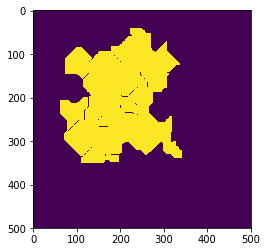

In [134]:
plt.imshow(mask)

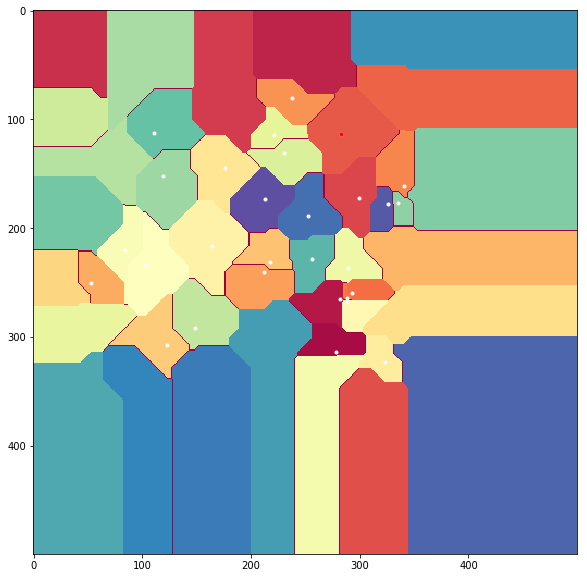

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(m_.T, cmap='Spectral')
plt.scatter(P[np.unique(m_[mask]), 0], P[np.unique(m_[mask]), 1], c='w', marker='.')
plt.scatter(P[7,0], P[7,1], c='r', marker='.')

In [138]:
max(counts)

4060

In [110]:
m[0,0,:]

array([ 2,  7, 11,  7, 10, 17])